WNixalo | 20181123

---

This notebook is an attempt to breach a score of 0.93 on the private leaderboard using ResNet34.

In [3]:
__version__ # fastai

'1.0.28'

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

## Data

In [4]:
path = Config.data_path()/'planet'
path.mkdir(exist_ok=True); #path

In [5]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [6]:
# np.random.seed(0)
src = (ImageItemList.from_csv(path, 'train_v2.csv', folder='train-jpg', suffix='.jpg')
       .random_split_by_pct(0.0001)
       .label_from_df(sep=' '))
data = (src.transform(tfms, size=128)
       .databunch()
       .normalize(imagenet_stats))

In [7]:
arch = models.resnet34
acc_025 = partial(accuracy_thresh, thresh=0.25)
f_score = partial(fbeta, thresh=0.25)
learn   = create_cnn(data, arch, metrics=[acc_025, f_score])

## Training

### size 128 stage 1

In [8]:
# learn.lr_find(); learn.recorder.plot()

In [8]:
lr = 1e-2

In [9]:
learn.fit_one_cycle(10, slice(lr)) # oh cool: fastai by default uses slice(None, 0.003, None) for max_lr

Total time: 10:07
epoch  train_loss  valid_loss  accuracy_thresh  fbeta   
1      0.118372    0.004901    1.000000         1.000000  (01:00)
2      0.108183    0.001784    1.000000         1.000000  (01:00)
3      0.108300    0.003552    1.000000         1.000000  (01:00)
4      0.102324    0.002872    1.000000         1.000000  (01:00)
5      0.101986    0.002763    1.000000         1.000000  (01:00)
6      0.097974    0.001640    1.000000         1.000000  (01:00)
7      0.093356    0.001292    1.000000         1.000000  (01:00)
8      0.091281    0.001641    1.000000         1.000000  (01:00)
9      0.089991    0.001758    1.000000         1.000000  (01:00)
10     0.088749    0.002201    1.000000         1.000000  (01:00)



In [11]:
# learn.lr_find(); learn.recorder.plot()

In [11]:
# learn.fit_one_cycle(6, slice(lr/10)) 

In [10]:
learn.save('planet-rn34-sz128-stg1-cyclen10-all')

### size 128 stage 2

In [22]:
learn.unfreeze()
# learn.lr_find(); learn.recorder.plot()

In [23]:
learn.fit_one_cycle(10, slice(1e-5, lr/5))

Total time: 15:05
epoch  train_loss  valid_loss  accuracy_thresh  fbeta   
1      0.089844    0.002748    1.000000         1.000000  (01:28)
2      0.093764    0.001791    1.000000         1.000000  (01:30)
3      0.092766    0.004137    1.000000         1.000000  (01:30)
4      0.088647    0.004206    1.000000         1.000000  (01:30)
5      0.086481    0.003484    1.000000         1.000000  (01:30)
6      0.086954    0.001938    1.000000         1.000000  (01:30)
7      0.083152    0.002265    1.000000         1.000000  (01:30)
8      0.080485    0.002935    1.000000         1.000000  (01:30)
9      0.080488    0.001985    1.000000         1.000000  (01:30)
10     0.077615    0.002631    1.000000         1.000000  (01:30)



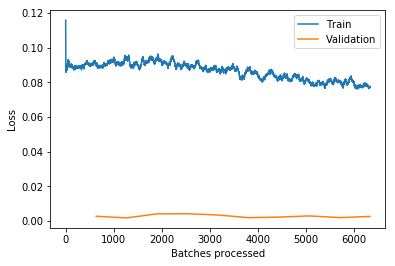

In [24]:
learn.recorder.plot_losses()

In [25]:
learn.save('planet-rn34-sz128-stg2-cyclen10-all')

### size 256 stage 1

In [26]:
data = (src.transform(tfms, size=256)
        .databunch().normalize(imagenet_stats))
learn.data = data

In [27]:
learn.freeze()
# learn.lr_find(); learn.recorder.plot()

In [28]:
lr = 5e-3 # 1e-2/2

In [29]:
learn.fit_one_cycle(10, slice(lr))

Total time: 33:41
epoch  train_loss  valid_loss  accuracy_thresh  fbeta   
1      0.086252    0.002070    1.000000         1.000000  (03:23)
2      0.084398    0.001038    1.000000         1.000000  (03:21)
3      0.086319    0.001850    1.000000         1.000000  (03:21)
4      0.088424    0.003380    1.000000         1.000000  (03:22)
5      0.084672    0.002116    1.000000         1.000000  (03:21)
6      0.086573    0.002854    1.000000         1.000000  (03:22)
7      0.081710    0.000990    1.000000         1.000000  (03:21)
8      0.081583    0.001937    1.000000         1.000000  (03:22)
9      0.079507    0.002083    1.000000         1.000000  (03:22)
10     0.078538    0.002106    1.000000         1.000000  (03:22)



In [30]:
learn.save('planet-rn34-sz256-stg1-cyclen10-all')

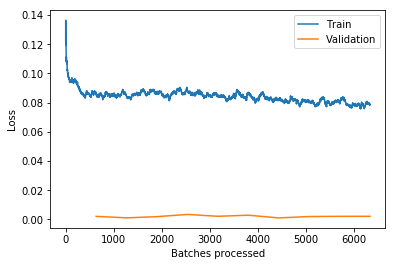

In [31]:
learn.recorder.plot_losses()

### size 256 stage 2

In [32]:
learn.unfreeze()
# learn.lr_find(); learn.recorder.plot()

In [33]:
lr = 1e-3

In [34]:
learn.fit_one_cycle(10, slice(1e-5, lr/5))

Total time: 49:39
epoch  train_loss  valid_loss  accuracy_thresh  fbeta   
1      0.079715    0.002106    1.000000         1.000000  (04:52)
2      0.079075    0.000994    1.000000         1.000000  (04:58)
3      0.080988    0.002322    1.000000         1.000000  (04:58)
4      0.081726    0.001434    1.000000         1.000000  (04:58)
5      0.080995    0.002119    1.000000         1.000000  (04:58)
6      0.077168    0.001749    1.000000         1.000000  (04:58)
7      0.076317    0.003150    1.000000         1.000000  (04:58)
8      0.076902    0.002232    1.000000         1.000000  (04:58)
9      0.074154    0.001783    1.000000         1.000000  (04:58)
10     0.074020    0.001996    1.000000         1.000000  (04:58)



In [35]:
learn.save('planet-rn34-sz256-stg2-cyclen10-all')

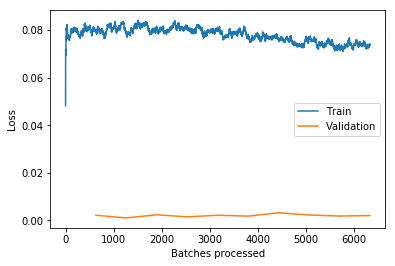

In [36]:
learn.recorder.plot_losses()

## Predictions

In [37]:
# learn.load('planet-rn34-sz256-stg2-all');

In [38]:
subm_df = pd.read_csv(path/'sample_submission_v2.csv')
subdic = {c1:c2 for c1,c2 in zip(subm_df.image_name,subm_df.tags)}

In [39]:
def set_test_datafolder(learner, test_folder):
    learner.data = (src.add_test_folder(test_folder)
                    .transform(tfms, size=256)
                    .databunch().normalize(imagenet_stats))

1st testset portion

In [40]:
set_test_datafolder(learn, 'test-jpg')
fnames = [f.name.split('.')[0] for f in learn.data.test_ds.x.items]

In [41]:
preds1 = learn.TTA(ds_type=DatasetType.Test)

Total time: 12:10



2nd testset portion

In [42]:
set_test_datafolder(learn, 'test-jpg-additional')
fnames.extend([f.name.split('.')[0] for f in learn.data.test_ds.x.items])

In [43]:
preds2 = learn.TTA(ds_type=DatasetType.Test)

Total time: 06:14



In [44]:
preds = (torch.cat((preds1[0],preds2[0])), torch.cat((preds1[1],preds2[1])))

saving results to disk

In [45]:
torch.save(preds, f'planet-rn34-sz256-stg2-cyclen10-all.pkl')

In [46]:
# preds = torch.load(f'planet-rn34-sz256-stg2.pkl')

## Submissions

In [47]:
import datetime
date = str(datetime.date.today()).replace('-','')

In [48]:
idx2class = {v:k for k,v in learn.data.c2i.items()}

In [61]:
th = 0.225

for i,fn in enumerate(fnames):
    subdic[fn] = ' '.join(idx2class[cdx] for cdx in np.where(preds[0][i]>=th)[0])
    
subm_col = [subdic[fn] for fn in subm_df.image_name]
subm_df.tags = subm_col

In [62]:
sub_msg = f"fastai {__version__}; rn34 2-stg; cyclen10 all-data; thresh:{th}; {date}"

In [63]:
sub_name = f'planet-rn34-sz256-stg2-alldata-cyclen10_{date}_th{str(th).replace(".","")}.csv'
subm_df.to_csv(path/'submissions/'/sub_name, index=False, )
! kaggle competitions submit -c planet-understanding-the-amazon-from-space -f {path}/submissions/{sub_name} -m "{sub_msg}"

100%|██████████████████████████████████████| 2.16M/2.16M [00:01<00:00, 1.57MB/s]
Successfully submitted to Planet: Understanding the Amazon from Space

training for 1 6-length cycle for each stage with 2 sizes:

    0.300 - 0.92455
    0.275 - 0.92582
    0.250 - 0.92638
    0.225 - 0.92618
    0.200 - 0.92527
    
training for 1 10-length cycle for each stage with 2 sizes:

    0.300 - 0.92157
    0.250 - 0.92452
    0.225 - 0.92487
    0.200 - 0.92479
    0.150 - 0.92083
    

## end